# Week 7 - HMM Implementation

We're going to look at heart rate measurements made over the course of a day, when the subject slept, generally rested, and also went cycling.

In [2]:
%matplotlib inline
import numpy as np
from hmmlearn.hmm import GaussianHMM
import matplotlib.pyplot as plt

hr = np.array([55, 55, 54, 53, 52, 51, 50, 49, 49, 49, 49, 49, 49, 49, 47, 47, 47, 47, 47, 47, 47, 48, 49, 54, 54, 54, 45, 45, 45, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 45, 45, 45, 45, 47, 49, 54, 54, 54, 45, 45, 45, 50, 50, 50, 47, 46, 45, 43, 43, 43, 44, 44, 44, 44, 44, 44, 45, 46, 47, 50, 50, 50, 46, 45, 44, 43, 43, 43, 43, 43, 43, 43, 44, 45, 52, 52, 52, 49, 48, 47, 45, 45, 45, 45, 45, 45, 44, 44, 44, 43, 43, 43, 44, 45, 46, 45, 46, 47, 54, 54, 54, 45, 45, 45, 45, 46, 47, 48, 48, 48, 46, 46, 46, 47, 47, 47, 47, 47, 47, 48, 48, 48, 47, 46, 45, 45, 45, 63, 63, 48, 47, 46, 46, 46, 46, 46, 46, 46, 45, 45, 45, 46, 47, 48, 49, 49, 49, 42, 42, 42, 42, 42, 42, 46, 49, 52, 58, 58, 58, 42, 42, 42, 43, 43, 43, 44, 44, 44, 44, 44, 44, 45, 45, 45, 45, 45, 45, 45, 46, 47, 49, 49, 49, 47, 46, 45, 45, 45, 45, 56, 56, 56, 49, 47, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 46, 46, 46, 45, 45, 45, 49, 49, 49, 49, 49, 49, 43, 43, 43, 44, 44, 44, 43, 43, 43, 44, 44, 44, 43, 43, 43, 45, 45, 45, 45, 45, 45, 45, 45, 45, 44, 44, 44, 44, 44, 44, 49, 49, 49, 45, 45, 45, 52, 52, 52, 46, 45, 44, 44, 44, 44, 45, 45, 45, 45, 46, 47, 47, 48, 49, 49, 49, 49, 49, 49, 49, 50, 50, 50, 46, 46, 46, 48, 48, 48, 47, 47, 47, 47, 48, 49, 50, 50, 50, 48, 48, 48, 49, 49, 49, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 44, 44, 44, 46, 46, 46, 44, 44, 44, 48, 48, 48, 47, 46, 45, 45, 45, 45, 46, 46, 46, 47, 47, 47, 46, 46, 46, 46, 46, 46, 46, 46, 46, 54, 54, 54, 43, 43, 43, 43, 43, 43, 44, 44, 44, 43, 43, 43, 45, 45, 45, 43, 43, 43, 43, 43, 43, 45, 45, 45, 44, 44, 44, 43, 43, 43, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 47, 49, 51, 54, 54, 54, 46, 46, 46, 47, 47, 47, 46, 46, 46, 47, 47, 47, 45, 45, 45, 49, 49, 49, 44, 44, 44, 46, 46, 46, 45, 45, 45, 45, 46, 47, 48, 48, 48, 46, 46, 46, 51, 51, 51, 45, 45, 45, 47, 47, 47, 47, 47, 47, 46, 46, 46, 46, 48, 50, 55, 55, 55, 48, 47, 46, 46, 46, 46, 47, 47, 47, 48, 48, 48, 47, 47, 47, 48, 48, 48, 48, 49, 50, 53, 53, 53, 50, 50, 50, 53, 53, 53, 50, 49, 48, 48, 48, 48, 69, 69, 69, 62, 58, 54, 50, 50, 50, 50, 50, 50, 50, 50, 50, 53, 53, 53, 49, 49, 49, 50, 51, 52, 55, 55, 55, 52, 51, 50, 50, 50, 50, 50, 50, 50, 59, 59, 67, 67, 68, 68, 68, 60, 60, 60, 95, 95, 95, 90, 90, 90, 114, 125, 136, 144, 144, 144, 136, 135, 134, 134, 134, 134, 145, 145, 145, 127, 127, 127, 131, 135, 139, 147, 147, 147, 133, 128, 123, 125, 121, 117, 106, 106, 106, 126, 132, 138, 136, 138, 140, 141, 141, 141, 139, 139, 139, 140, 141, 142, 141, 142, 143, 155, 155, 155, 153, 152, 151, 148, 148, 148, 156, 156, 156, 154, 152, 150, 149, 148, 147, 146, 145, 144, 142, 141, 140, 139, 139, 139, 139, 139, 139, 143, 143, 143, 142, 141, 140, 139, 139, 139, 139, 139, 139, 142, 143, 144, 145, 145, 145, 125, 125, 125, 147, 147, 147, 146, 144, 142, 136, 136, 136, 142, 142, 142, 142, 142, 142, 133, 126, 119, 113, 107, 101, 94, 94, 94, 94, 95, 96, 95, 100, 105, 132, 136, 140, 140, 140, 140, 139, 136, 133, 126, 126, 126, 141, 142, 143, 143, 143, 143, 143, 144, 145, 145, 147, 149, 153, 153, 153, 132, 120, 108, 91, 91, 91, 91, 98, 105, 128, 135, 142, 142, 142, 142, 138, 136, 134, 134, 134, 134, 144, 145, 146, 146, 146, 146, 146, 146, 146, 146, 146, 146, 149, 149, 149, 146, 146, 146, 147, 148, 149, 153, 153, 153, 153, 153, 153, 152, 151, 150, 150, 149, 148, 149, 147, 145, 132, 125, 118, 114, 114, 114, 140, 140, 140, 138, 135, 132, 127, 123, 119, 117, 115, 113, 114, 111, 108, 100, 100, 100, 100, 100, 100, 98, 98, 98, 105, 105, 105, 105, 105, 105, 112, 112, 112, 101, 97, 93, 91, 91, 91, 104, 104, 104, 99, 99, 99, 99, 103, 107, 134, 134, 134, 133, 133, 133, 133, 135, 137, 147, 147, 147, 144, 144, 144, 151, 151, 151, 149, 148, 147, 146, 146, 146, 146, 146, 146, 145, 138, 131, 115, 112, 109, 109, 109, 88, 88, 81, 81, 81, 85, 90, 95, 106, 106, 106, 84, 84, 84, 94, 98, 102, 103, 103, 103, 78, 74, 70, 70, 70, 70, 78, 78, 78, 78, 77, 76, 74, 74, 74, 75, 75, 75, 75, 75, 75, 93, 93, 93, 83, 83, 83, 85, 85, 71, 71, 63, 63, 63, 79, 79, 79, 66, 63, 60, 60, 60, 60, 60, 61, 62, 63, 63, 63, 62, 62, 62, 63, 64, 65, 65, 65, 65, 62, 62, 62, 69, 72, 75, 72, 76, 80, 96, 96, 96, 96, 96, 96, 96, 96, 96, 86, 81, 76, 74, 71, 68, 66, 64, 62, 63, 62, 61, 60, 60, 60, 60, 62, 64, 76, 76, 76, 70, 68, 66, 65, 65, 65, 71, 71, 71, 71, 69, 67, 62, 62, 62, 74, 74, 74, 74, 74, 74, 74, 72, 70, 66, 65, 64, 64, 64, 64, 80, 84, 88, 88, 88, 88, 88, 88, 88, 82, 79, 76, 78, 75, 72, 65, 64, 63, 63, 63, 63, 64, 64, 64, 63, 63, 63, 63, 63, 63, 64, 64, 64, 65, 65, 65, 63, 63, 63, 66, 72, 78, 94, 94, 94, 92, 92, 92, 92, 92, 92, 83, 83, 83, 88, 88, 88, 81, 78, 75, 74, 74, 74, 75, 75, 75, 71, 69, 67, 68, 67, 66, 67, 66, 65, 62, 62, 62, 65, 65, 65, 65, 64, 63, 62, 62, 62, 62, 62, 62, 61, 61, 61, 61, 61, 61, 62, 65, 68, 77, 77, 77, 58, 58, 58, 58, 62, 66, 89, 89, 89, 88, 88, 78, 78, 78, 78, 78, 60, 60, 60, 60, 60, 60, 56, 56, 56, 57, 57, 57, 55, 55, 55, 55, 56, 57, 58, 58, 58, 58, 58, 58, 59, 59, 59, 58, 58, 58, 58, 58, 58, 60, 60, 60, 59, 58, 57, 56, 56, 56, 61, 61, 61, 59, 59, 59, 62, 62, 62, 62, 61, 60, 59, 59, 59, 76, 76, 76, 76, 73, 70, 57, 57, 57, 59, 59, 59, 59, 59, 59, 56, 56, 56, 62, 62, 62, 59, 57, 55, 54, 54, 54, 55, 56, 57, 56, 57, 58, 60, 60, 60, 56, 56, 56, 62, 66, 70, 77, 77, 77, 66, 62, 58, 58, 58, 58, 58, 58, 58, 57, 56, 55, 54, 54, 54, 54, 55, 56, 56, 57, 58, 59, 60, 61, 61, 61, 61, 55, 55, 55, 58, 58, 58, 56, 56, 56, 58, 61, 64, 69, 69, 69, 55, 55, 55, 68, 68, 68, 58, 57, 56, 56, 56, 56, 55, 55, 55, 56, 59, 62, 68, 68, 68, 66, 64, 62, 58, 56, 54, 54, 54, 54, 62, 62, 62, 62, 62, 62, 62, 62, 62, 61, 60, 59, 59, 59, 59, 60, 60, 60, 60, 60, 60, 60, 61, 62, 66, 66, 66, 59, 58, 57, 58, 57, 56, 55, 55, 55, 58, 58, 58, 58, 58, 58, 59, 59, 59, 59, 60, 61, 66, 66, 66, 63, 62, 61, 60, 60, 60, 62, 62, 62, 59, 59, 59, 59, 59, 59, 61, 61, 61, 59, 59, 59, 59, 60, 61, 66, 70, 74, 82, 82, 82, 55, 55, 55, 55, 55, 55, 56, 57, 58, 57, 61, 65, 82, 82, 82, 59, 56, 53, 53, 53, 53, 53, 54, 55, 56, 56, 56, 55, 55, 55, 55, 55, 55, 56, 56, 56, 56, 56, 56, 57, 57, 57, 57, 57, 57, 62, 62, 62, 62, 61, 60, 57, 57, 57, 68, 68, 68, 63, 63, 63, 63, 63, 63, 60, 60, 60, 65, 65, 65, 62, 62, 62, 66, 66, 66, 63, 63, 63, 71, 71, 71, 60, 60, 60, 60, 60, 60, 59, 59, 59, 61, 61, 61, 57, 57, 57, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 59, 63, 63, 63, 61, 61, 61, 62, 62, 62, 62, 61, 60, 59, 59, 59, 60, 60, 60, 59, 59, 59, 58, 58, 58, 57, 57, 57, 57, 57, 57, 59, 60, 61, 61, 61, 61, 60, 60, 60, 59, 59, 59, 61, 62, 63, 63, 63, 63, 60, 60, 60, 60, 60, 60, 60, 60, 60, 61, 62, 63, 62, 63, 64, 89, 89, 89, 81, 78, 75, 74, 74, 74, 79, 81, 83, 83, 83, 83, 83, 81, 79, 73, 70, 67, 64, 64, 64, 64, 64, 64, 62, 62, 62, 65, 65, 65, 64, 64, 64, 63, 63, 63, 64, 64, 64, 62, 61, 60, 60, 60, 60, 61, 64, 67, 70, 74, 78, 83, 83, 83, 60, 60, 60, 63, 63, 63, 61, 61, 61, 69, 69, 69, 64, 63, 62, 62, 62, 62, 61, 61, 61, 60, 60, 60, 60, 60, 60, 59, 59, 59, 60, 60, 60, 58, 58, 58, 61, 62, 63, 63, 65, 67, 74, 74, 74, 67, 67, 67, 69, 73, 77, 80, 86, 92, 104, 104, 104, 95, 90, 85, 81, 80, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 78, 76, 74, 71, 71, 71, 73, 73, 73, 68, 65, 62, 56, 56, 56, 56, 56, 56, 56, 56, 56, 58, 58, 58, 54, 54, 54, 59, 59, 59, 57, 57, 57, 57, 57, 57, 58, 58, 58, 57, 57, 57, 57, 57, 57, 58, 59, 60, 61, 61, 61, 57, 57, 57, 59, 59, 59, 58, 58, 58, 58, 58, 58, 52, 52, 52, 70, 70, 70, 70, 70, 70, 67, 66, 65, 64, 63, 62, 63, 62, 61, 54, 54, 54, 57, 57, 57, 57, 57, 57, 56, 55, 54, 52, 52, 52, 56, 56, 56, 56, 56, 56, 55, 55, 55, 61, 61, 61, 61, 61, 61, 64, 65, 66, 67, 67, 67, 50, 49, 48, 48, 48, 48, 51, 51, 51, 51, 51, 51, 51, 51, 51, 50, 50, 50, 49, 49, 49, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 48, 49, 49, 49, 50, 50, 50, 50, 50, 50, 49, 49, 49, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 51, 52, 52, 53, 54, 55, 56, 57, 60, 60, 60, 56, 55, 54, 55, 54, 53, 52, 52, 52, 56, 56, 56, 53, 53, 53, 53, 53, 53, 53, 53, 53, 58, 58, 58, 50, 50, 50, 51, 51, 51, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 55, 55, 55, 49, 49, 49, 49, 49, 49, 50, 52, 54, 60, 60, 60, 50, 49, 48, 48, 48, 48, 48, 48, 48, 49, 49, 49, 48, 48, 48, 47, 47, 47, 48, 48, 48, 48, 48], dtype=np.float)

/var/folders/1z/f8jdrp1x28qcyj9441xlpz_m0000gr/T/ipykernel_3818/3960779320.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  hr = np.array([55, 55, 54, 53, 52, 51, 50, 49, 49, 49, 49, 49, 49, 49, 47, 47, 47, 47, 47, 47, 47, 48, 49, 54, 54, 54, 45, 45, 45, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 45, 45, 45, 45, 47, 49, 54, 54, 54, 45, 45, 45, 50, 50, 50, 47, 46, 45, 43, 43, 43, 44, 44, 44, 44, 44, 44, 45, 46, 47, 50, 50, 50, 46, 45, 44, 43, 43, 43, 43, 43, 43, 43, 44, 45, 52, 52, 52, 49, 48, 47, 45, 45, 45, 45, 45, 45, 44, 44, 44, 43, 43, 43, 44, 45, 46, 45, 46, 47, 54, 54, 54, 45, 45, 45, 45, 46, 47, 48, 48, 48, 46, 46, 46, 47, 47, 47, 47, 

#### (1) Load the data and plot the observations.

You'll need to figure out an time axis vector for the data (it was recorded starting from midnight at even intervals over 24 hours).

Text(0, 0.5, 'Heart rate / bpm')

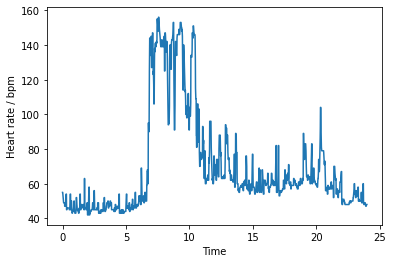

In [3]:
# Answer
tps = np.linspace(0,24, len(hr))
plt.plot(tps, hr)
plt.xlabel('Time')
plt.ylabel('Heart rate / bpm')

#### (2) Do you see regions where there might be differences in behavior?

The person was probably asleep at hours 0-6, engaging in exercise from hours 6-11, and awake but not active for hours 11-24.

#### (3) Based on when you might expect someone would be asleep, plot the histogram of resting heart rate values.

The simplest emissions to use with `hmmlearn` are Gaussian ones. If our emissions are not Gaussian, we can still transform our data in some way to make it look more like a normal distribution. Given the shape of this distribution, do you think any transformation of the data would be helpful? Justify your answer.

AD test score for pre-transformed data: 19.084097161090313
AD test score for log-transformed data: 15.579406265584225
AD test score for root-transformed data: 17.255500712630464


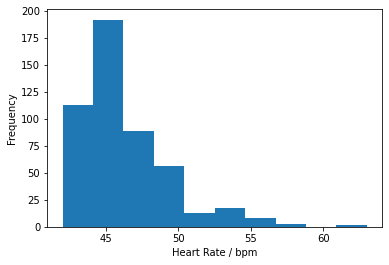

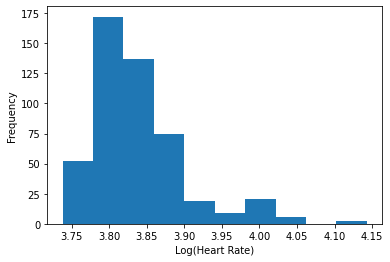

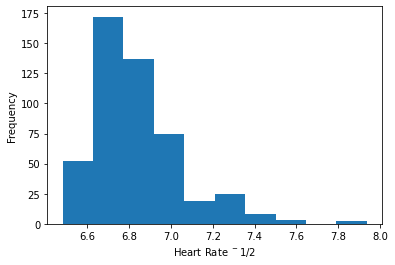

In [4]:
# Answer
from scipy.stats import kstest, zscore, anderson
slhr = int(len(hr)*6/24)
sleep = hr[:slhr]
plt.figure()
plt.hist(sleep)
plt.xlabel("Heart Rate / bpm")
plt.ylabel("Frequency")
plt.figure()
sleepGau = np.log(sleep)
plt.hist(sleepGau)
plt.xlabel("Log(Heart Rate)")
plt.ylabel("Frequency")
plt.figure()
sleepGau2 = np.sqrt(sleep)
plt.hist(sleepGau2)
plt.xlabel("Heart Rate $^-1/2$")
plt.ylabel("Frequency")
#a = kstest(zscore(sleep), 'norm')
#b = kstest(zscore(sleepGau), 'norm')
#c = kstest(zscore(sleepGau2), 'norm')
a1 = anderson(zscore(sleep), dist = 'norm')
b1 = anderson(zscore(sleepGau), dist = 'norm')
c1 = anderson(zscore(sleepGau2), dist = 'norm')
print("AD test score for pre-transformed data:", a1[0])
print("AD test score for log-transformed data:", b1[0])
print("AD test score for root-transformed data:", c1[0])

Based on the Anderson-Darling test performed on both log-transformed and root-transformed data, both transformations make the data look more like a normal distribution than it originally did. However, the log transform did so more effectively as the Anderson-Darling statistic was smaller, thereby indicating closer adherence to a normal distribution than that of the original and root-transformed data.

#### (4) One way to deal with noisy data is to use a moving average. Plot the moving average of the data for two different windows. How does this help visualize the data? What is lost using this approach?

Hint: Look at the points with a sharp transition. What does the moving average do here?

Text(0, 0.5, 'Heart Rate/bpm')

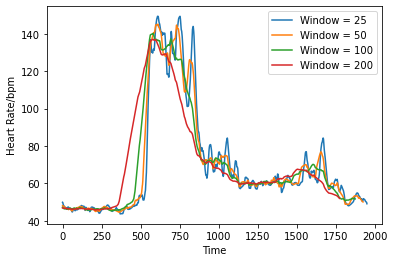

In [5]:
# Answer
def movavg(vals, window):
    weights = np.repeat(1, window)/window
    combine = np.squeeze(vals)
    return np.convolve(combine, weights, 'valid')
plt.plot(movavg(hr,25), label = "Window = 25")
plt.plot(movavg(hr, 50), label = "Window = 50")
plt.plot(movavg(hr,100), label = "Window = 100")
plt.plot(movavg(hr,200), label = "Window = 200")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Heart Rate/bpm")

By plotting the moving average, this helps to visualize the data by reducing the amount of noise present, smoothening the curve, and allows us to clearly see the general fluctuations in data and how they relate to different activity states, as seen with a window sizes of 50 and 100. Using this approach, we lose noise as well as any minor changes in the heart rate at a particular time point, and this effect is greater as we increase the window size. However, if we make the window too big, we start to lose information on the major changes in heart rate, as the effect of these extreme points "bleeds" into adjacent regions, causing the data to become less accurate, as seen with window size 200, where the shape of the curve begins to stray away from the original data and more like a smooth curve.

#### (5) We're going to fit an HMM model to this data with three underlying states. This involves three sets of parameters about the model—describe each briefly.

Answer.

Sleeping State: When heart rate is at its lowest and below 60 bpm.

Active State: When the person is under stress, leading to highest heart rate above 95 bpm.

Resting State: When the person is awake but not active, the heart rate is between 60-95 bpm.

Initial Probability: The probability of starting in a certain state.

Transition Probability: The probability of moving from a given state to another. 

Emission Probability: The probability of a given heart rate given a state.

#### (6) Fit an HMM model with Gaussian emissions to the data. Use any transformations as necessary.

How does the model respond to rapid state changes? Overlay the raw measurements and HMM state over time.

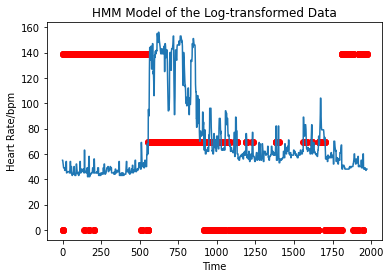

In [7]:
# Answer
Model = GaussianHMM(n_components = 3, n_iter = 1000, tol = 0.00001).fit(np.log(hr).reshape(-1,1))
States = Model.predict(np.log(hr).reshape(-1,1))
plt.scatter(range(len(hr)), States*np.mean(hr), color = 'r')
plt.title("HMM Model of the Log-transformed Data")
plt.xlabel("Time")
plt.ylabel("Heart Rate/bpm")
plt.plot(hr)

The model responds well to rapid state changes, especially for transitions from the sleeping state to an active state, as seen where the model swiftly changes from a sleeping state to an active state when the heart rate sharply rises. However, the model does not perform as well in gradual changes in data, as seen in the first 500 data points and from data points 1000-1700, where the model briefly transitions into other states. Although these determined states could be accurate, this is realistically unlikely for human behavior (such as waking up multiple times for an hour apiece at night or sudden bursts of exercise throughout the day).

#### (7) From the HMM model determine when you think the subject woke up in the morning. Compare this prediction to the data you obtain with the moving average.

Hint: `model.predict_proba(X)` can give you the probability of being in each state at each time point.

Using the log-transformed data, we predict the person to wake up at hour: 6.759878419452887
Using the moving average data, we predict the person to wake up at hour: 6.383376623376623


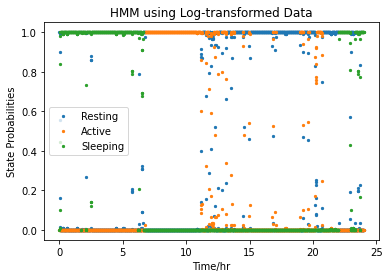

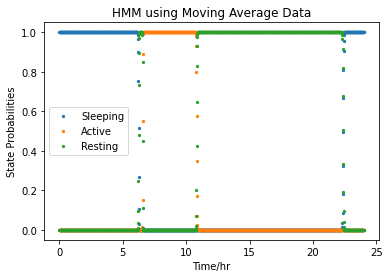

In [6]:
# Answer
Stateactivity = Model.predict_proba(np.log(hr).reshape(-1,1))
arr = Stateactivity[:,2]
if (np.mean(arr[:500]) <= 0.5):
    column1 = 0
    plt.figure()
    plt.scatter(tps, Stateactivity[:,0], label = "Sleeping", s = 5)
    plt.scatter(tps, Stateactivity[:,1], label = "Active", s = 5)
    plt.scatter(tps, Stateactivity[:,2], label = "Resting", s = 5)
    plt.legend()
    plt.title("HMM using Log-transformed Data")
    plt.xlabel("Time/hr")
    plt.ylabel("State Probabilities")
if (np.mean(arr[:500]) > 0.5):
    column1 = 2
    plt.figure()
    plt.scatter(tps, Stateactivity[:,0], label = "Resting", s = 5)
    plt.scatter(tps, Stateactivity[:,1], label = "Active", s = 5)
    plt.scatter(tps, Stateactivity[:,2], label = "Sleeping", s = 5)
    plt.legend()
    plt.title("HMM using Log-transformed Data")
    plt.xlabel("Time/hr")
    plt.ylabel("State Probabilities")

tps2 = np.linspace(0,24,len(movavg(hr,50)))
Model2 = GaussianHMM(n_components = 3, n_iter = 1000, tol = 0.00001).fit(movavg(hr,50).reshape(-1,1))
State2 = Model2.predict_proba(movavg(hr,50).reshape(-1,1))
arr2 = State2[:,2]
if (np.mean(arr2[:500]) < 0.1):
    column2 = 0
    plt.figure()
    plt.scatter(tps2, State2[:,0], label = "Sleeping", s = 5)
    plt.scatter(tps2, State2[:,1], label = "Active", s = 5)
    plt.scatter(tps2, State2[:,2], label = "Resting", s = 5)
    plt.title("HMM using Moving Average Data")
    plt.legend()
    plt.xlabel("Time/hr")
    plt.ylabel("State Probabilities")
    
if (np.mean(arr2[:500]) > 0.9):
    column2 = 2
    plt.figure()
    plt.scatter(tps2, State2[:,0], label = "Resting", s = 5)
    plt.scatter(tps2, State2[:,1], label = "Active", s = 5)
    plt.scatter(tps2, State2[:,2], label = "Sleeping", s = 5)
    plt.title("HMM using Moving Average Data")
    plt.legend()
    plt.xlabel("Time/hr")
    plt.ylabel("State Probabilities")
    
def frame(i, Statearr, num, column):
    arr = np.zeros(num+1)
    b = np.intc(num/2)
    arr[b] = Statearr[i,column]
    x = 1
    while (x <= num/2):
        if (i >= x):
            arr[b - x] = Statearr[i-x,column]
        arr[b + x] = Statearr[i+x,column]
        x = x+1
    return np.mean(arr)
      
def tester(Statearr,num,tps,column):
    i = 0
    a = 0
    while i in range(len(tps)):
        if (a == 0):
            if frame(i, Statearr, num, column) <= 0.01:
                a = 1
                i1 = i*24/len(tps)
            else:
                i = i+1
        if (a == 1):
            i = len(tps) + 1
    return i1
print("Using the log-transformed data, we predict the person to wake up at hour:", tester(Stateactivity,20,tps,column1))
print("Using the moving average data, we predict the person to wake up at hour:", tester(State2, 20, tps2, column2))

The log-transformed data predicted a later wake-up time than that of the moving average data. This is likely due to the fact that the moving average data produces a less noisy and smoother curve, resulting in a less steeper gradient when transitioning between sleeping and active states at the 6-7 hour mark and thereby an earlier wake-up time.

#### (8) Describe one form of other information you could use from a smart watch to make a more accurate determination of the user's state.

How would you use that in your HMM model?

Answer.
I would use the accelerometer of the smart watch to help make a more accurate determination of the user's state. If the wearer is truly asleep, there would be minimal to no motion, with some motion when resting, and a high amount of motion when active. As such, I would make the observation of the HMM model a linear combination of both the heart rate and accelerometer reading from the smart watch, and after fitting and predicting using this data, compare these predictions to the original HMM models to compare the viability of this new predictive model.